# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime as dt
from scipy.stats import linregress
%matplotlib inline

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 584


---

In [3]:
print(cities)


['ushuaia', 'chonchi', 'camocim', 'tiksi', 'blackmans bay', 'taroa', 'adamstown', 'okahao', 'ambodifotatra', 'saipan', 'yellowknife', "kapa'a", 'limbe', 'kavaratti', 'badger', 'daru', 'kokstad', 'santiago de cao', 'salalah', 'steinbach', 'klyuchi', 'puerto san carlos', 'howard springs', 'kaa-khem', 'college', 'taiohae', 'mirabad', 'puerto natales', 'waitangi', 'aasiaat', 'invercargill', 'aioun', 'codrington', "st. john's", 'edinburgh of the seven seas', 'chibougamau', 'tannum sands', 'ilulissat', 'hamilton', 'albany', 'merowe', 'bredasdorp', 'wailua homesteads', 'khandyga', 'ribeira grande', 'rakops', 'margaret river', 'selkirk', 'port mathurin', 'carnarvon', 'shatsk', 'severo-yeniseyskiy', 'grytviken', 'constantia', 'ocean shores', 'nadym', 'kourou', 'ampanihy', 'whitehorse', 'saint-francois', 'afaahiti', 'okhotsk', 'ahau', 'afipskiy', 'kismayo', 'rio gallegos', 'dalbandin', 'remire-montjoly', 'olgii', 'new norfolk', 'brokopondo', 'bethel', 'zheshart', 'puerto ayora', "nuku'alofa", 's

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
# note from openweatehrmap.org this api call is for current weather data (cf not historical data)
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="




# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url).json()
        
        #print(response)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response['coord']['lat']
        city_lng = response['coord']['lon']
        city_max_temp = response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_clouds = response['clouds']['all']
        city_wind = response['wind']['speed']
        city_country = response['sys']['country']
        city_date = response['dt']
        
        #print(f"The latitude information received is: {city_lat}")

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max_Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind_Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | chonchi
Processing Record 3 of Set 1 | camocim
Processing Record 4 of Set 1 | tiksi
Processing Record 5 of Set 1 | blackmans bay
Processing Record 6 of Set 1 | taroa
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | okahao
Processing Record 9 of Set 1 | ambodifotatra
Processing Record 10 of Set 1 | saipan
Processing Record 11 of Set 1 | yellowknife
Processing Record 12 of Set 1 | kapa'a
Processing Record 13 of Set 1 | limbe
Processing Record 14 of Set 1 | kavaratti
Processing Record 15 of Set 1 | badger
Processing Record 16 of Set 1 | daru
Processing Record 17 of Set 1 | kokstad
Processing Record 18 of Set 1 | santiago de cao
Processing Record 19 of Set 1 | salalah
Processing Record 20 of Set 1 | steinbach
Processing Record 21 of Set 1 | klyuchi
Processing Record 22 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Rec

In [222]:
#print(city_data)

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          557
Lat           557
Lng           557
Max_Temp      557
Humidity      557
Cloudiness    557
Wind_Speed    557
Country       557
Date          557
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,2.81,93,100,2.06,AR,1684233131
1,chonchi,-42.6128,-73.8092,6.73,93,47,1.49,CL,1684233132
2,camocim,-2.9022,-40.8411,26.66,84,44,4.78,BR,1684233033
3,tiksi,71.6872,128.8694,-3.54,90,100,4.39,RU,1684233133
4,blackmans bay,-43.0167,147.3167,6.07,76,36,3.13,AU,1684233134


In [7]:
# convert unix UTC timestamp to ISO

city_data_df['intDate'] = city_data_df['Date'].astype(int)

city_data_df.head()

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date,intDate
0,ushuaia,-54.8000,-68.3000,2.81,93,100,2.06,AR,1684233131,1684233131
1,chonchi,-42.6128,-73.8092,6.73,93,47,1.49,CL,1684233132,1684233132
2,camocim,-2.9022,-40.8411,26.66,84,44,4.78,BR,1684233033,1684233033
3,tiksi,71.6872,128.8694,-3.54,90,100,4.39,RU,1684233133,1684233133
4,blackmans bay,-43.0167,147.3167,6.07,76,36,3.13,AU,1684233134,1684233134


In [8]:
city_data_df['ISOdate'] = pd.to_datetime(city_data_df['intDate'], unit='s')
city_data_df['ISOdateOnly'] = pd.to_datetime(city_data_df['ISOdate'].dt.strftime('%Y-%m-%d'))
city_data_df.head()

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date,intDate,ISOdate,ISOdateOnly
0,ushuaia,-54.8000,-68.3000,2.81,93,100,2.06,AR,1684233131,1684233131,2023-05-16 10:32:11,2023-05-16
1,chonchi,-42.6128,-73.8092,6.73,93,47,1.49,CL,1684233132,1684233132,2023-05-16 10:32:12,2023-05-16
2,camocim,-2.9022,-40.8411,26.66,84,44,4.78,BR,1684233033,1684233033,2023-05-16 10:30:33,2023-05-16
3,tiksi,71.6872,128.8694,-3.54,90,100,4.39,RU,1684233133,1684233133,2023-05-16 10:32:13,2023-05-16
4,blackmans bay,-43.0167,147.3167,6.07,76,36,3.13,AU,1684233134,1684233134,2023-05-16 10:32:14,2023-05-16


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date,intDate,ISOdate,ISOdateOnly
City_ID,,,,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,2.81,93,100,2.06,AR,1684233131,1684233131,2023-05-16 10:32:11,2023-05-16
1,chonchi,-42.6128,-73.8092,6.73,93,47,1.49,CL,1684233132,1684233132,2023-05-16 10:32:12,2023-05-16
2,camocim,-2.9022,-40.8411,26.66,84,44,4.78,BR,1684233033,1684233033,2023-05-16 10:30:33,2023-05-16
3,tiksi,71.6872,128.8694,-3.54,90,100,4.39,RU,1684233133,1684233133,2023-05-16 10:32:13,2023-05-16
4,blackmans bay,-43.0167,147.3167,6.07,76,36,3.13,AU,1684233134,1684233134,2023-05-16 10:32:14,2023-05-16


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [11]:
# get measurement date

measurement_date = city_data_df.loc[0, 'ISOdateOnly']
measurement_date

'2023-05-16'

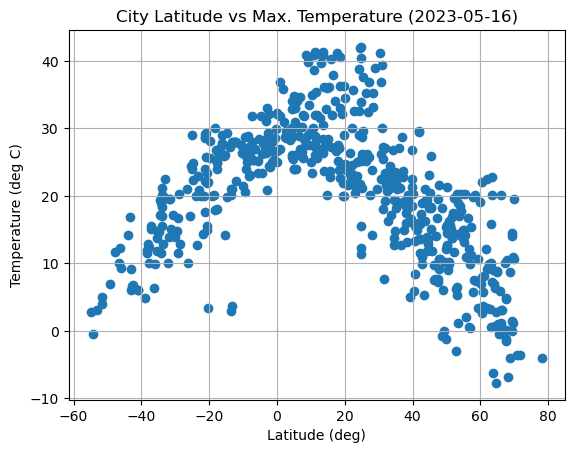

In [13]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max_Temp'])

# Incorporate the other graph properties
plt.title(f"City Latitude vs Max. Temperature ({measurement_date})")
plt.ylabel("Temperature (deg C)")
plt.xlabel("Latitude (deg)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

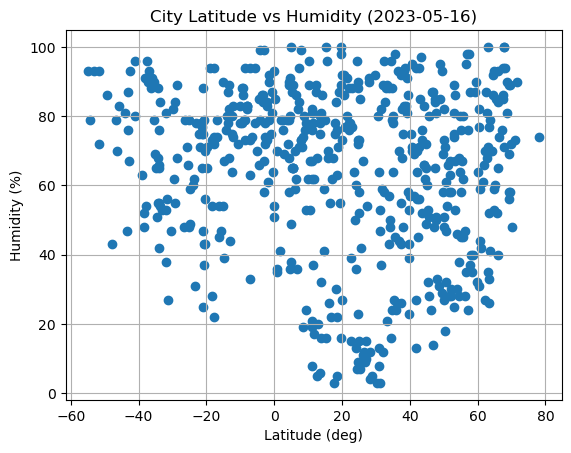

In [14]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])

# Incorporate the other graph properties
plt.title(f"City Latitude vs Humidity ({measurement_date})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude (deg)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

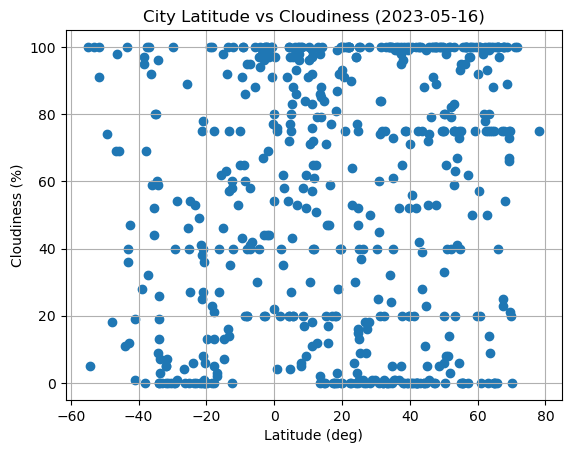

In [15]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.title(f"City Latitude vs Cloudiness ({measurement_date})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude (deg)")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

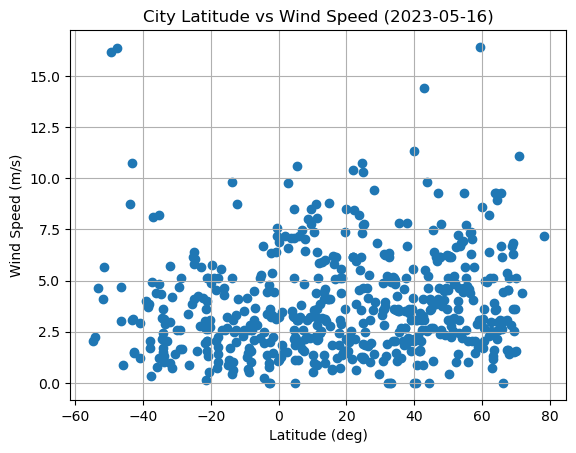

In [16]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind_Speed'])

# Incorporate the other graph properties
plt.title(f"City Latitude vs Wind Speed ({measurement_date})")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude (deg)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [17]:
# Define a function to create Linear Regression plots

def drawPlot(x_values, y_values, xlabel, ylabel):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) + ", r="+ str(round(rvalue,2)) +", $r^{2}$=" + str(round(rvalue**2,3))
    print(line_eq)
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    xmin, xmax, ymin, ymax = plt.axis()
    
    anno_x = xmin + (xmax-xmin)/10
    anno_y = ymin + (ymax-ymin)/10
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.annotate(line_eq, xy=(anno_x, anno_y),fontsize=12,color="red")
    plt.show()
    

In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df.loc[(city_data_df['Lat']>=0), :])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date,intDate,ISOdate,ISOdateOnly
City_ID,,,,,,,,,,,,
3,tiksi,71.6872,128.8694,-3.54,90,100,4.39,RU,1684233133,1684233133,2023-05-16 10:32:13,2023-05-16
5,taroa,8.7058,171.2275,27.69,80,17,7.99,MH,1684233134,1684233134,2023-05-16 10:32:14,2023-05-16
9,saipan,15.1355,145.7010,28.39,100,20,4.12,MP,1684233137,1684233137,2023-05-16 10:32:17,2023-05-16
10,yellowknife,62.4560,-114.3525,9.29,87,75,5.14,CA,1684233028,1684233028,2023-05-16 10:30:28,2023-05-16
11,kapa'a,22.0752,-159.3190,23.18,77,100,6.17,US,1684233139,1684233139,2023-05-16 10:32:19,2023-05-16


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df.loc[(city_data_df['Lat']<0), :])
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date,intDate,ISOdate,ISOdateOnly
City_ID,,,,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,2.81,93,100,2.06,AR,1684233131,1684233131,2023-05-16 10:32:11,2023-05-16
1,chonchi,-42.6128,-73.8092,6.73,93,47,1.49,CL,1684233132,1684233132,2023-05-16 10:32:12,2023-05-16
2,camocim,-2.9022,-40.8411,26.66,84,44,4.78,BR,1684233033,1684233033,2023-05-16 10:30:33,2023-05-16
4,blackmans bay,-43.0167,147.3167,6.07,76,36,3.13,AU,1684233134,1684233134,2023-05-16 10:32:14,2023-05-16
6,adamstown,-25.0660,-130.1015,23.94,79,0,5.81,PN,1684233135,1684233135,2023-05-16 10:32:15,2023-05-16


###  Temperature vs. Latitude Linear Regression Plot

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
y = -0.44x + 35.55, r=-0.81, $r^{2}$=0.654


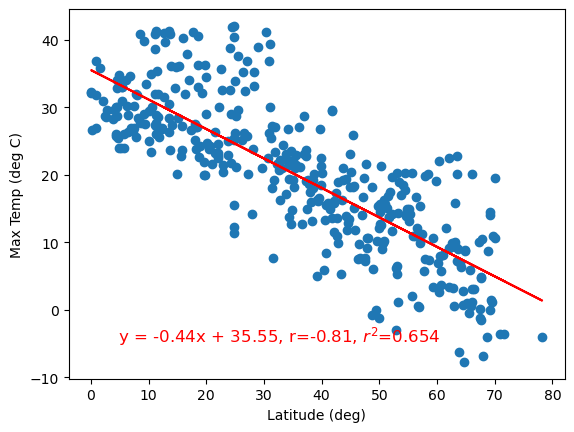

In [20]:
# Linear regression on Northern Hemisphere
drawPlot(northern_hemi_df['Lat'], northern_hemi_df['Max_Temp'], "Latitude (deg)", "Max Temp (deg C)")


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
y = 0.43x + 29.55, r=0.79, $r^{2}$=0.626


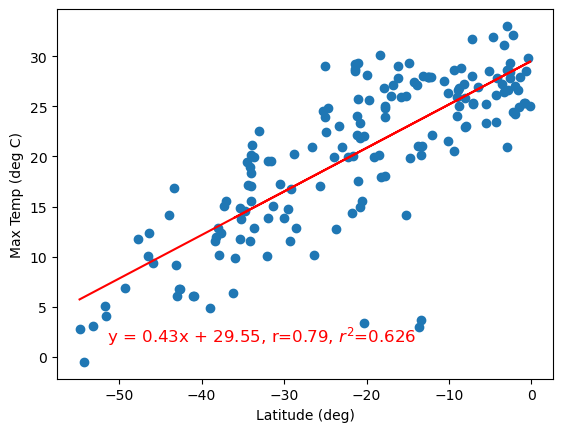

In [21]:
# Linear regression on Southern Hemisphere
drawPlot(southern_hemi_df['Lat'], southern_hemi_df['Max_Temp'], "Latitude (deg)", "Max Temp (deg C)")

**Discussion about the linear relationship:** There is a strong linear relationship between max. temperature and the latitude from the equator. Highest maximum temperatures are seen nearest the equator in both northern and southern hemispheres with maximum temperatures decreasing the further one moves from the equator, be it north or south.

### Humidity vs. Latitude Linear Regression Plot

y = 0.06x + 59.18, r=0.05, $r^{2}$=0.002
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


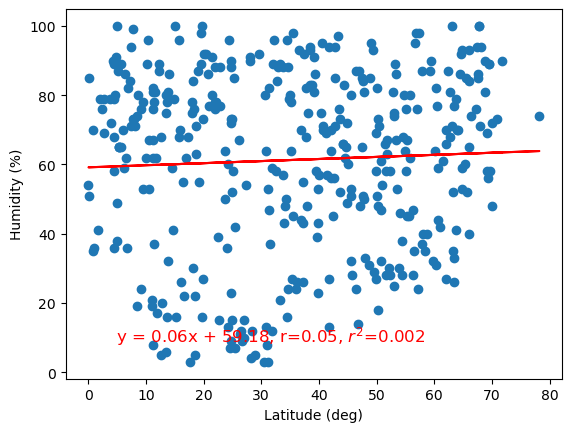

In [22]:
# Northern Hemisphere
drawPlot(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], "Latitude (deg)", "Humidity (%)")

y = 0.13x + 74.14, r=0.1, $r^{2}$=0.011
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


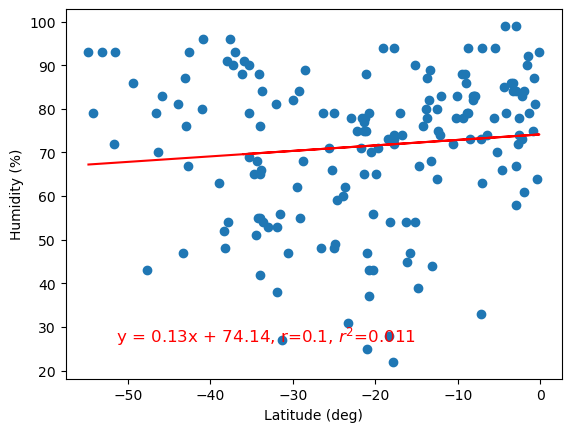

In [23]:
# Southern Hemisphere
drawPlot(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], "Latitude (deg)", "Humidity (%)")

**Discussion about the linear relationship:** Interestingly, there does not appear to be any significant relationship between humidity and latitude from the equator. This is the case for both northern and southern hemispheres. This may indicate that other influences impact more on local humidity than latitude, possibly related to geography, land mass, ocean currents or presence of mountainous terrain. This would need further analysis to tease out.

### Cloudiness vs. Latitude Linear Regression Plot

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
y = 0.15x + 51.19, r=0.08, $r^{2}$=0.007


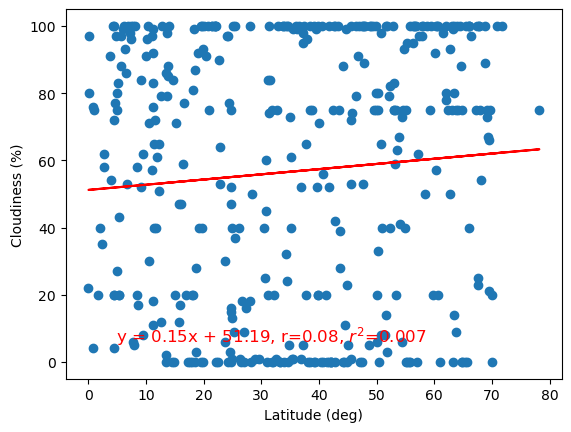

In [24]:
# Northern Hemisphere
drawPlot(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], "Latitude (deg)", "Cloudiness (%)")

y = 0.54x + 59.28, r=0.21, $r^{2}$=0.042
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


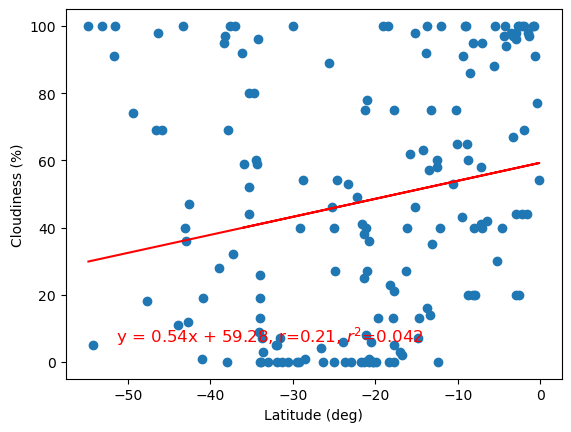

In [25]:
# Southern Hemisphere
drawPlot(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], "Latitude (deg)", "Cloudiness (%)")

**Discussion about the linear relationship:** Cloudiness also demonstrated no significant relationship with latitude from the equator. This is likely because of the interaction of multiple complex weather systems and behaviours, seasonal variation in weather etc.

### Wind Speed vs. Latitude Linear Regression Plot

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
y = 0.01x + 3.69, r=0.07, $r^{2}$=0.005


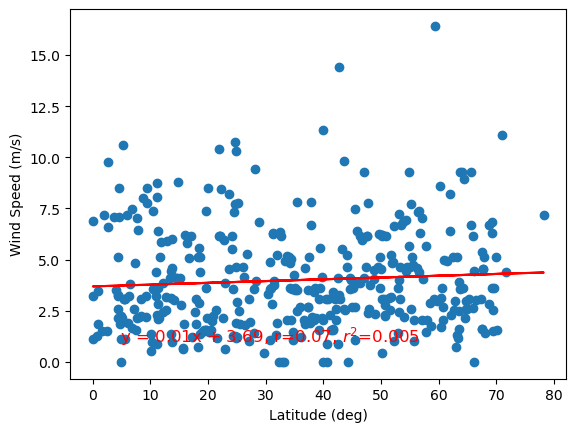

In [26]:
# Northern Hemisphere
drawPlot(northern_hemi_df['Lat'], northern_hemi_df['Wind_Speed'], "Latitude (deg)", "Wind Speed (m/s)")

y = -0.03x + 2.67, r=-0.18, $r^{2}$=0.031
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


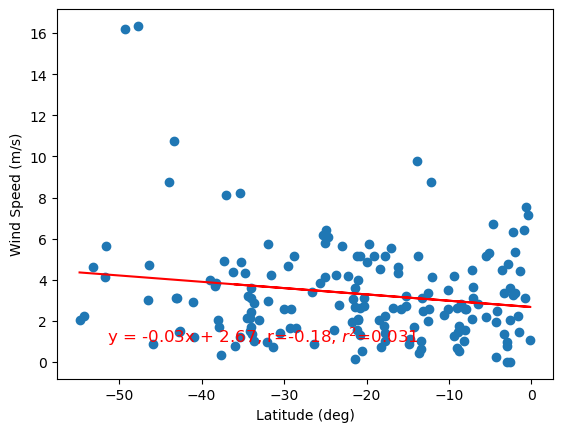

In [27]:
# Southern Hemisphere
drawPlot(southern_hemi_df['Lat'], southern_hemi_df['Wind_Speed'], "Latitude (deg)", "Wind Speed (m/s)")

**Discussion about the linear relationship:** Although there appears to be something of relationship between wind speed and latitude from the equator, the actual impact in real terms is difficult to ascertain. This is due to the very poor fit of the model to the data as shown by the very small r-squared values. It would be very difficult to make any real meaningful judgement from this data.